Subquestion 1: Which types of public transport have been affected most from the COVID pandemic? Are there larger changes in certain types of transport than others?


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

filename_part = "Mobility_trend__per_stage__travel_modes_06102025_113641.csv"
#looking for the file starting from the notebook
start_dir = os.getcwd()

found_path = None

#Because the file could not be found on every laptop, we created a forloop that searches for the specific title on each seperate map, 
#When found, it returns the correct file needed. 

for root, dirs, files in os.walk(start_dir):
    for file in files:
        if filename_part in file:
            found_path = os.path.join(root, file)
            break
    if found_path:
        break

# Controleer of het bestand gevonden is
if not found_path:
    raise FileNotFoundError(f"File not found: '{filename_part} searched from: {start_dir}")


# CSV inlezen
df = pd.read_csv(found_path, sep=";", encoding="utf-8", header=0)


print(df.head())

print(df.columns.tolist())

                     Sex             Age Modes of travel  \
0  Total male and female  18 to 24 years           Total   
1  Total male and female  18 to 24 years           Total   
2  Total male and female  18 to 24 years           Total   
3  Total male and female  18 to 24 years           Total   
4  Total male and female  18 to 24 years           Total   

                             Travel motives Margins Periods  \
0  Travel to/from work, (non)-daily commute   Value   2014*   
1  Travel to/from work, (non)-daily commute   Value   2015*   
2  Travel to/from work, (non)-daily commute   Value   2016*   
3  Travel to/from work, (non)-daily commute   Value   2017*   
4  Travel to/from work, (non)-daily commute   Value   2018*   

  Stages per person per day (average) (number)  \
0                                         0.82   
1                                         0.79   
2                                         0.79   
3                                         0.80   
4         

In [2]:
df_motive = df[df["Travel motives"]=="Travel to/from work, (non)-daily commute"]
print(df_motive.head())


                     Sex             Age Modes of travel  \
0  Total male and female  18 to 24 years           Total   
1  Total male and female  18 to 24 years           Total   
2  Total male and female  18 to 24 years           Total   
3  Total male and female  18 to 24 years           Total   
4  Total male and female  18 to 24 years           Total   

                             Travel motives Margins Periods  \
0  Travel to/from work, (non)-daily commute   Value   2014*   
1  Travel to/from work, (non)-daily commute   Value   2015*   
2  Travel to/from work, (non)-daily commute   Value   2016*   
3  Travel to/from work, (non)-daily commute   Value   2017*   
4  Travel to/from work, (non)-daily commute   Value   2018*   

  Stages per person per day (average) (number)  \
0                                         0.82   
1                                         0.79   
2                                         0.79   
3                                         0.80   
4         

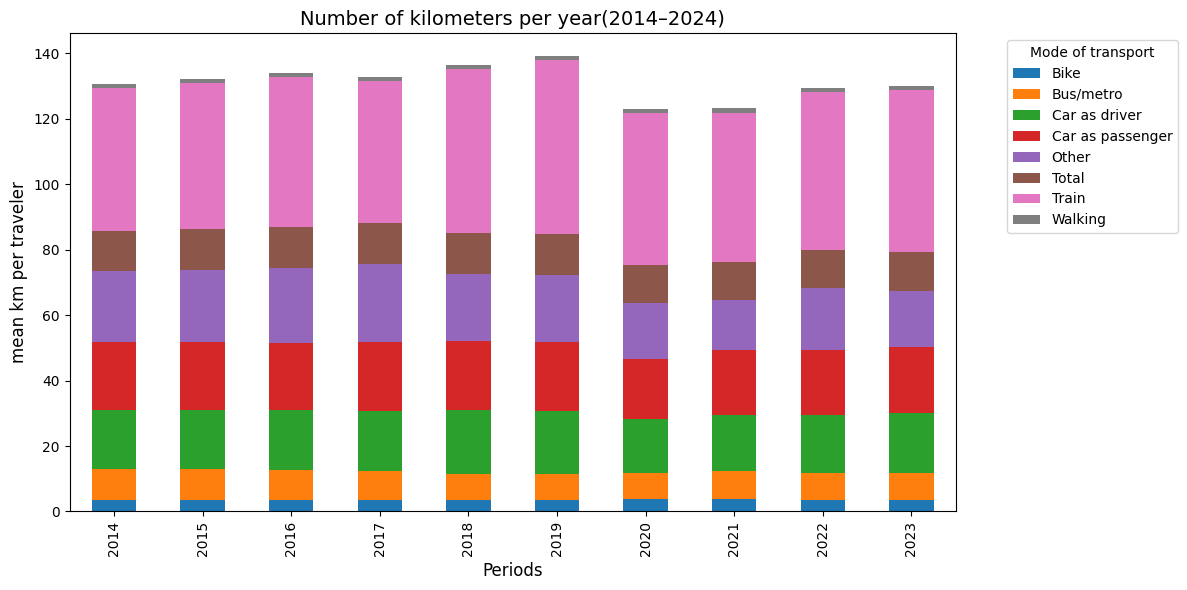

In [3]:
#staven
#dataframe alleen filteren voor werkverkeer. per mode of travel, per jaar, aantal kilometers

#df_motive = df_motive.iloc[:, [3, 6, 8]]

df= df[["Modes of travel", "Periods", "Distance travelled per stage (average) (passenger kilometres)"]]


df["Periods"] = (df["Periods"].astype(str).str.replace("*", "", regex=False).str.strip())
df["Periods"] = pd.to_numeric(df["Periods"], errors="coerce")

# Convert distance column to numeric

df["Distance travelled per stage (average) (passenger kilometres)"] = pd.to_numeric(
    df["Distance travelled per stage (average) (passenger kilometres)"], errors="coerce"
)


df = df[df["Periods"].between(2014, 2024)]

pivot_df = df.pivot_table(
    index="Periods",
    columns="Modes of travel",
    values="Distance travelled per stage (average) (passenger kilometres)",
    aggfunc="mean"
)

plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, ax=plt.gca())


plt.title("Number of kilometers per year(2014–2024)", fontsize=14)
plt.xlabel("Periods", fontsize=12)
plt.ylabel("mean km per traveler", fontsize=12)
plt.legend(title="Mode of transport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



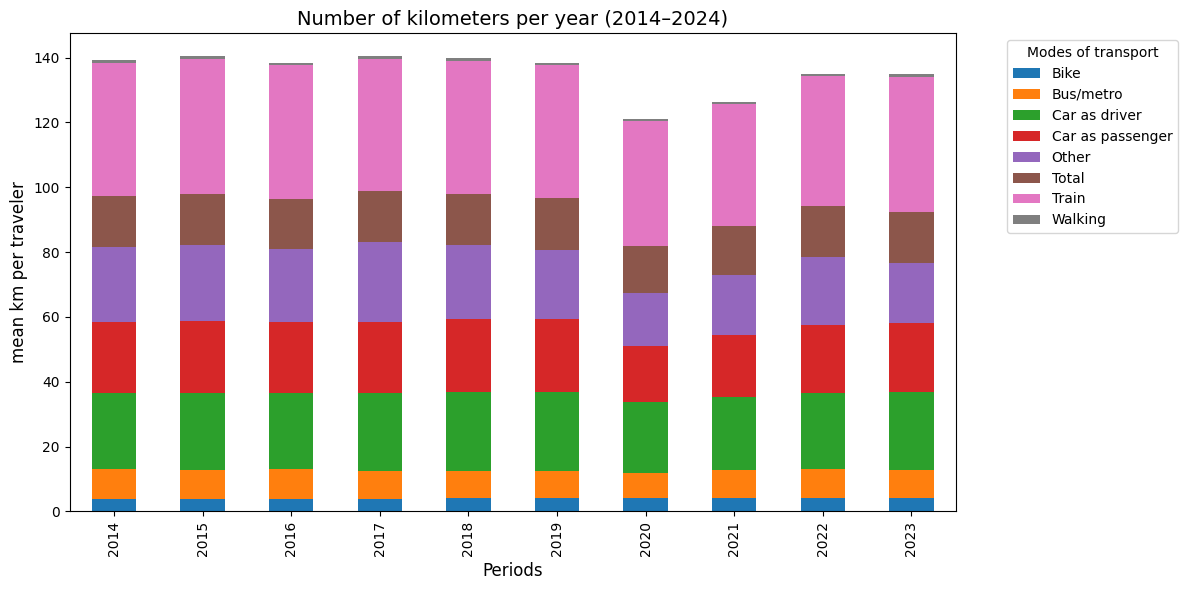

In [4]:

def find_col(cols, keywords):
    for c in cols:
        if isinstance(c, str):
            low = c.lower()
            if any(k in low for k in keywords):
                return c
    return None

# ensure df_motive exists (fall back to df if not)
if 'df_motive' not in globals():
    df_motive = df.copy()

mode_col = find_col(df_motive.columns, ['mode', 'modes', 'mode of travel', 'modes of travel', 'travel mode'])
period_col = find_col(df_motive.columns, ['period', 'periods', 'year'])
distance_col = find_col(df_motive.columns, ['distance', 'distance travelled', 'passenger', 'kilometre', 'kilometer'])

if not (mode_col and period_col and distance_col):
    raise KeyError(f"Could not find required columns automatically. Available columns: {df_motive.columns.tolist()}")

# select and normalize names
df_motive = df_motive[[mode_col, period_col, distance_col]].rename(columns={
    mode_col: "Modes of travel",
    period_col: "Periods",
    distance_col: "Distance travelled per stage (average) (passenger kilometres)"
}).copy()

# clean Periods -> numeric year
df_motive["Periods"] = df_motive["Periods"].astype(str).str.replace("*", "", regex=False).str.strip()
df_motive["Periods"] = pd.to_numeric(df_motive["Periods"], errors="coerce")

# convert Distance to numeric
df_motive["Distance travelled per stage (average) (passenger kilometres)"] = pd.to_numeric(df_motive["Distance travelled per stage (average) (passenger kilometres)"], errors="coerce")

# filter years and drop rows with missing values needed for pivot
df_motive = df_motive[df_motive["Periods"].between(2014, 2024)]
df_motive = df_motive.dropna(subset=["Modes of travel", "Periods", "Distance travelled per stage (average) (passenger kilometres)"])

pivot_df_motive = df_motive.pivot_table(
    index="Periods",
    columns="Modes of travel",
    values="Distance travelled per stage (average) (passenger kilometres)",
    aggfunc="mean"
).sort_index()

plt.figure(figsize=(12, 6))
pivot_df_motive.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Number of kilometers per year (2014–2024)", fontsize=14)
plt.xlabel("Periods", fontsize=12)
plt.ylabel("mean km per traveler", fontsize=12)
plt.legend(title="Modes of transport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# ...existing


